(test-functions:franke-5)=
# (5th) Franke Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The (5th) Franke function is a two-dimensional scalar-valued function.
The function was first introduced in {cite}`Franke1979` in the context of
interpolation problem.

```{note}
The Franke's original report {cite}`Franke1979` contains in total
six two-dimensional test functions:

- {ref}`(1st) Franke function <test-functions:franke-1>`: Two Gaussian peaks
  and a Gaussian dip on a surface slopping down the upper right boundary
- {ref}`(2nd) Franke function <test-functions:franke-2>`: Two nearly flat
  regions joined by a sharp rise running diagonally
- {ref}`(3rd) Franke function <test-functions:franke-3>`: A saddle shaped
  surface
- {ref}`(4th) Franke function <test-functions:franke-4>`: A Gaussian hill
  that slopes off in a gentle fashion
- {ref}`(5th) Franke function <test-functions:franke-5>`: A steep Gaussian hill
  that approaches zero at the boundaries (_this function_)
- {ref}`(6th) Franke function <test-functions:franke-6>`: A part of a sphere

The term "Franke function" typically only refers to the (1st) Franke function.
```

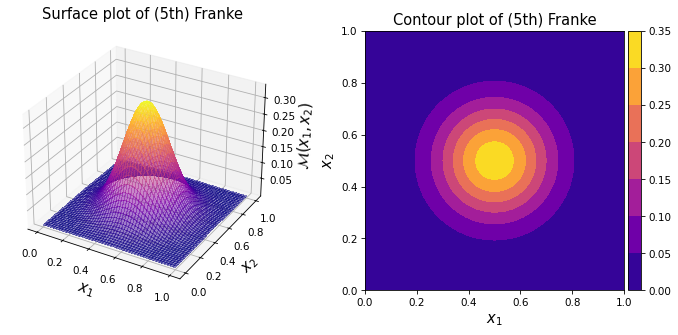

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fun = uqtf.Franke5()

# --- Create 2D data
xx_1d = np.linspace(0.0, 1.0, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(10, 5))

# Surface
axs_1 = plt.subplot(121, projection='3d')
axs_1.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_1.set_xlabel("$x_1$", fontsize=14)
axs_1.set_ylabel("$x_2$", fontsize=14)
axs_1.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_1.set_title("Surface plot of (5th) Franke", fontsize=14)

# Contour
axs_2 = plt.subplot(122)
cf = axs_2.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_title("Contour plot of (5th) Franke", fontsize=14)
divider = make_axes_locatable(axs_2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_2.axis('scaled')

fig.tight_layout(pad=4.0)
plt.gcf().set_dpi(75);

As shown in the plots above, the function features a Gaussian hill that slopes
in a steeper fashion as compared to the {ref}`(4th) Franke function <test-functions:franke-4>`.
The maximum of the function is located at $(0.5, 0.5)$ with a height of $\frac{1}{3}$.

```{note}
The (5th) Franke function is a modified form of the {ref}`McLain S2 function <test-functions:mclain-s2>`
{cite}`McLain1974`.

Specifically, the domain of the function is translated from $[1.0, 10.0]^2$
to $[0.0, 1.0]^2$ with some additional slight modifications to "enhance the
visual aspects" of the resulting surfaces.
```

## Test function instance

To create a default instance of the (5th) Franke function:

In [3]:
my_testfun = uqtf.Franke5()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Franke5
Spatial dimension : 2
Description       : (5th) Franke function from Franke (1979)


## Description

The (4th) Franke function is defined as follows:

$$
\mathcal{M}(\boldsymbol{x}) = \frac{1}{3} \exp{\left[ -\frac{81}{4} \left( (x_1 - 0.5)^2 + (x_2 - 0.5)^2 \right) \right]}
$$
where $\boldsymbol{x} = \{ x_1, x_2 \}$
is the two-dimensional vector of input variables further defined below.

## Probabilistic input

Based on {cite}`Franke1979`, the probabilistic input model
for the function consists of two independent random variables as shown below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([0., 1.]), name='X2', description='None')), copulas=None, name='Franke1979', description='Input specification for the test functions from Franke (1979).')

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

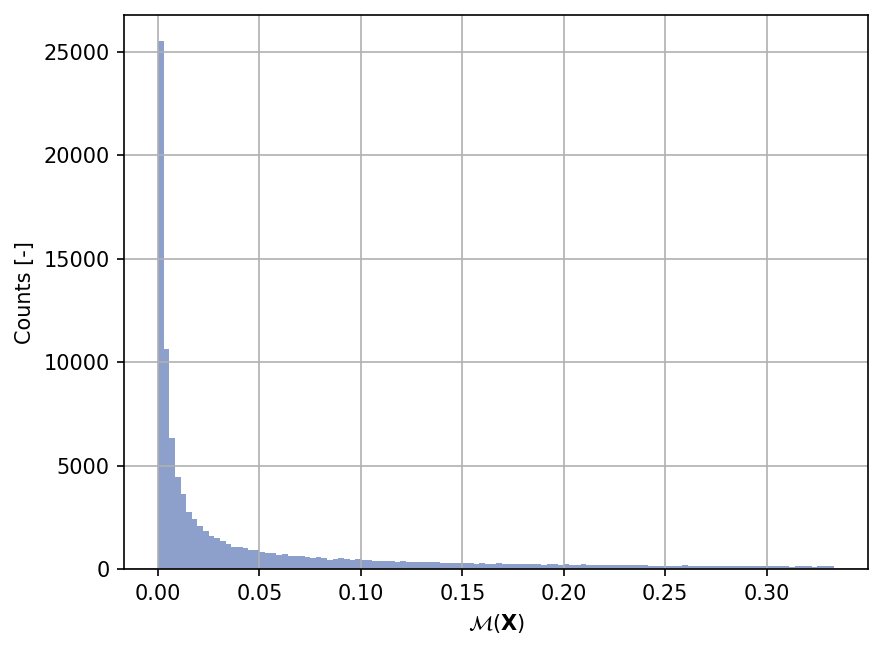

In [6]:
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```